### Install libs

In [ ]:
%pip install -r requirements.txt

### Loading the dataset

In [1]:
import os
import json
import zipfile

In [3]:
os.mkdir("kaggle")                                                                  # Create a directory to store the data

In [2]:
os.environ['KAGGLE_USERNAME'] = json.load(open("kaggle/kaggle.json"))['username']   # Download the data
os.environ['KAGGLE_KEY'] = json.load(open("kaggle/kaggle.json"))['key']
!kaggle datasets download -d padmapriyatr/netflix-titles


  0%|          | 0.00/1.34M [00:00<?, ?B/s]
 75%|███████▍  | 1.00M/1.34M [00:00<00:00, 2.05MB/s]
100%|██████████| 1.34M/1.34M [00:00<00:00, 2.57MB/s]


In [3]:
with zipfile.ZipFile("netflix-titles.zip", 'r') as zip_ref:                  # Unzip the data
    zip_ref.extractall("kaggle")
os.remove("netflix-titles.zip")                             

### Import libs

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
netflix_overall = pd.read_csv("kaggle/netflix_titles.csv")                  # Read the data
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_shows = netflix_overall[netflix_overall['type'] =='TV Show']        # Separate the data into movies and shows
netflix_movies = netflix_overall[netflix_overall['type'] =='Movie'] 

###  Analysis of Movies и TV Shows

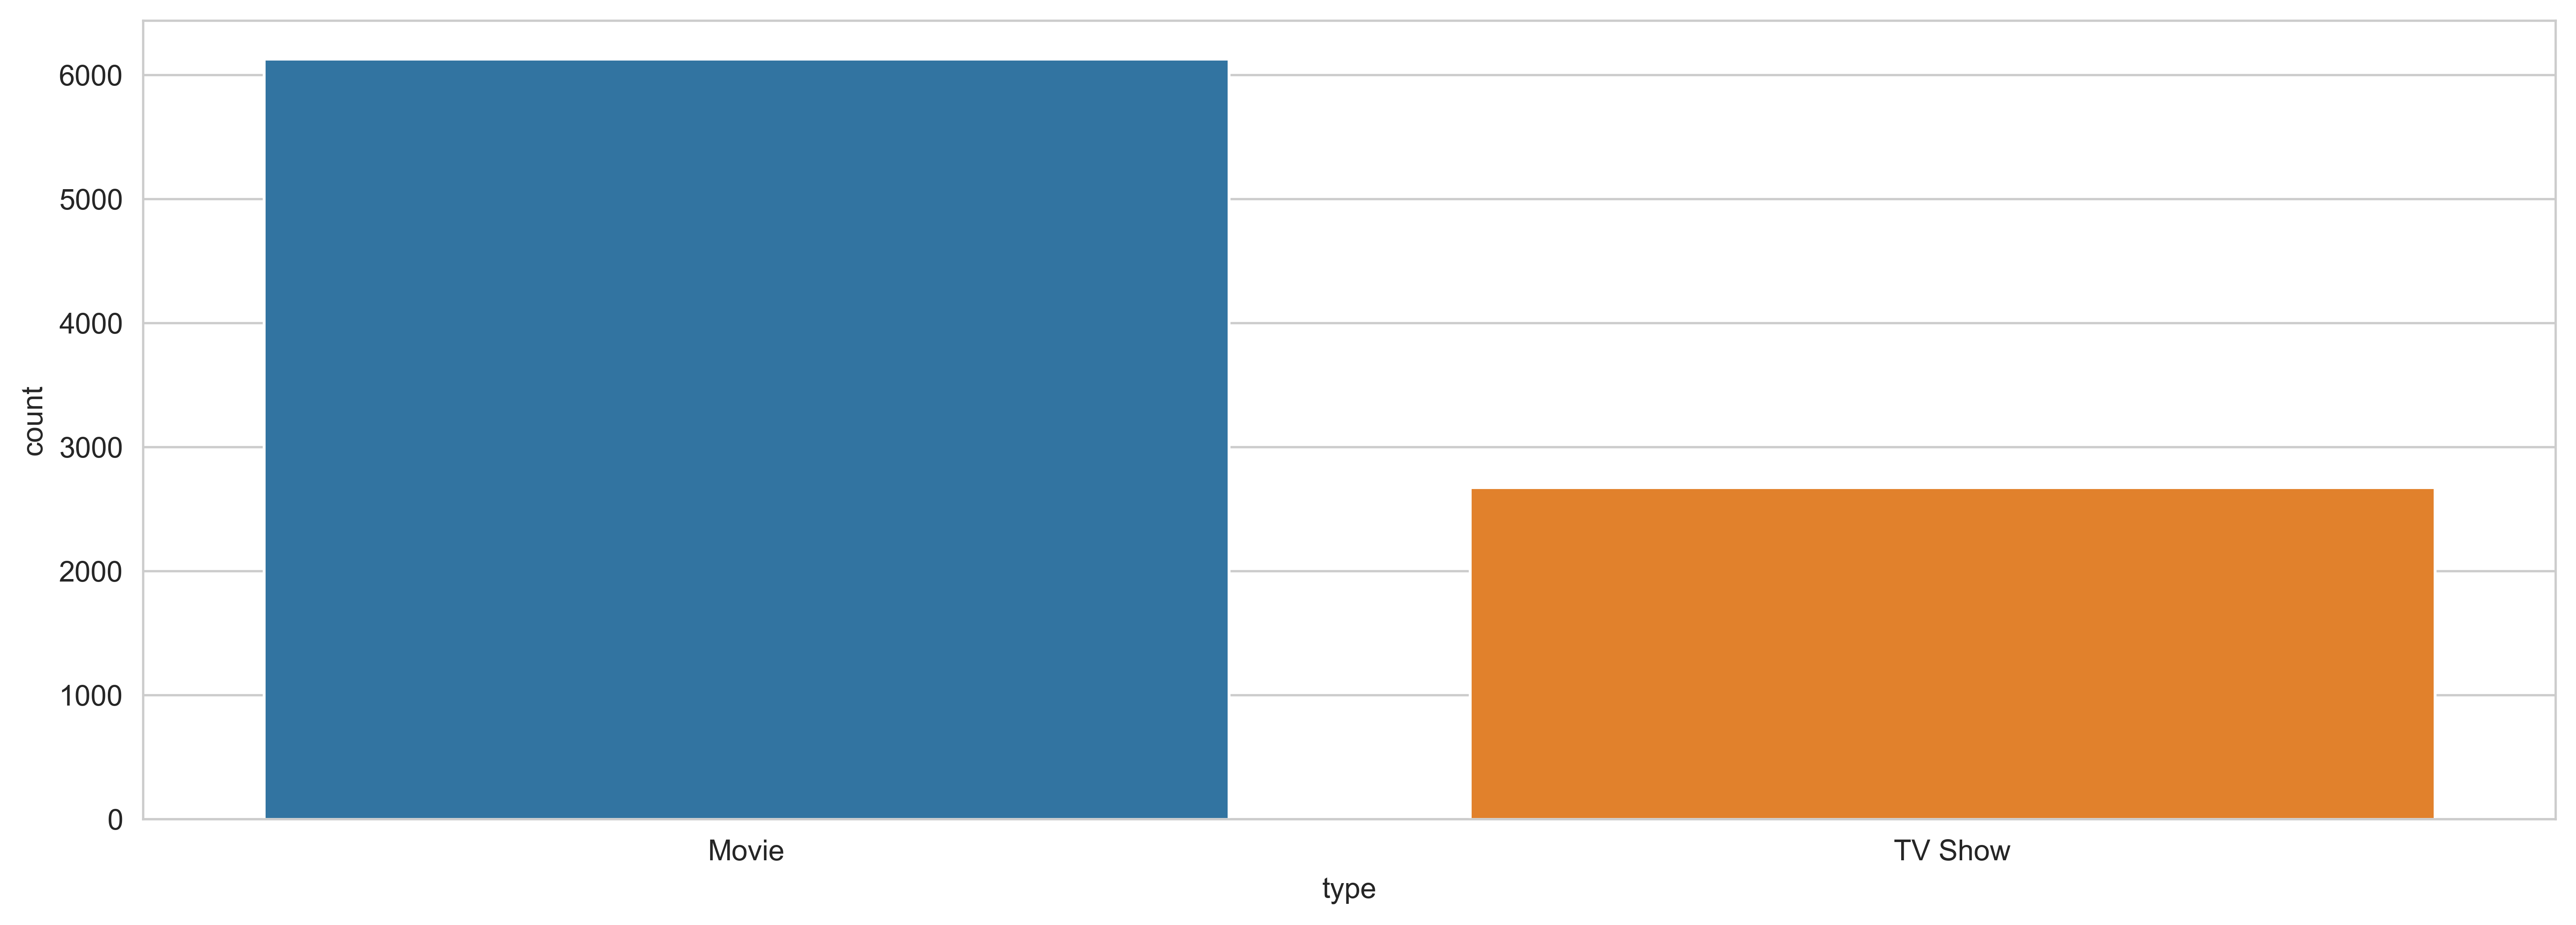

In [6]:
plt.figure(figsize=(15, 5), dpi=500)                                        # Set the size of the figure                           
sns.set_style('whitegrid')                                                  # Set the style of the plot                                                                    
m_tv = sns.countplot(x="type", data=netflix_overall, hue="type")            # Create the plot  

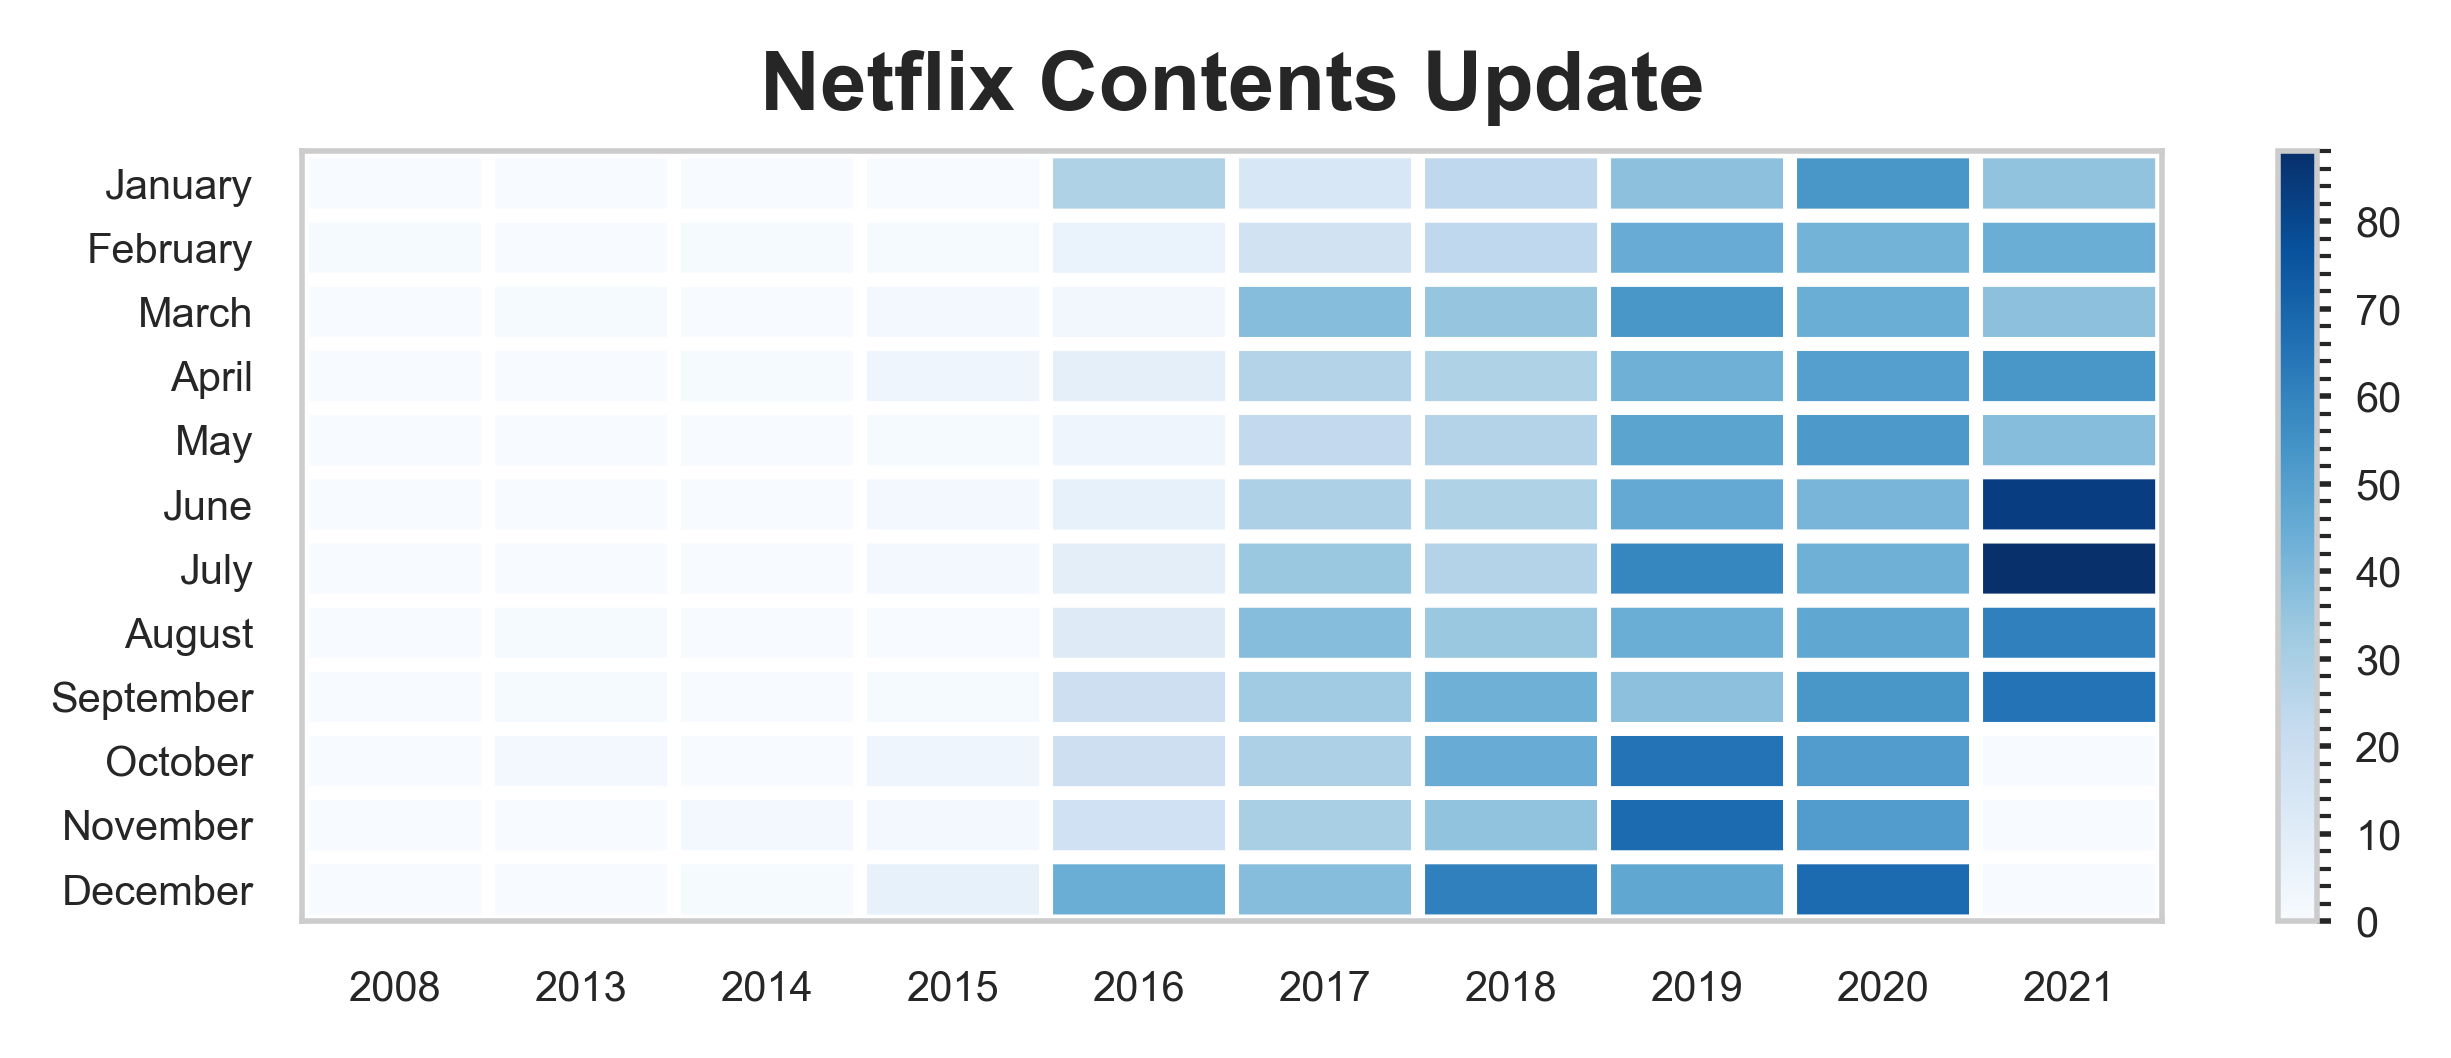

In [7]:
netflix_date = netflix_shows[['date_added']].dropna()                                          # Drop the missing values
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])          # Extract the year
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])  # Extract the month

month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December'][::-1]                           # Set the order of the month
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T   # Create the dataframe

plt.figure(figsize=(6, 2), dpi=500)                                                            # Set the size of the figure
plt.pcolor(df, cmap="Blues", edgecolors='white', linewidths=2)                                 # Create the heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=6, fontfamily='Arial')     # Set the x-ticks
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=6, fontfamily='Arial')         # Set the y-ticks

plt.title('Netflix Contents Update', fontsize=12, fontfamily='Arial', fontweight='bold')       # Set the title
cbar = plt.colorbar()                                                                          # Create the colorbar

cbar.ax.tick_params(labelsize=6, length=2)                                                     # Set the tick size
cbar.ax.minorticks_on()                                                                        # Set the minor ticks
plt.show()                                                                                     # Show the plot

### Movie ratings analysis

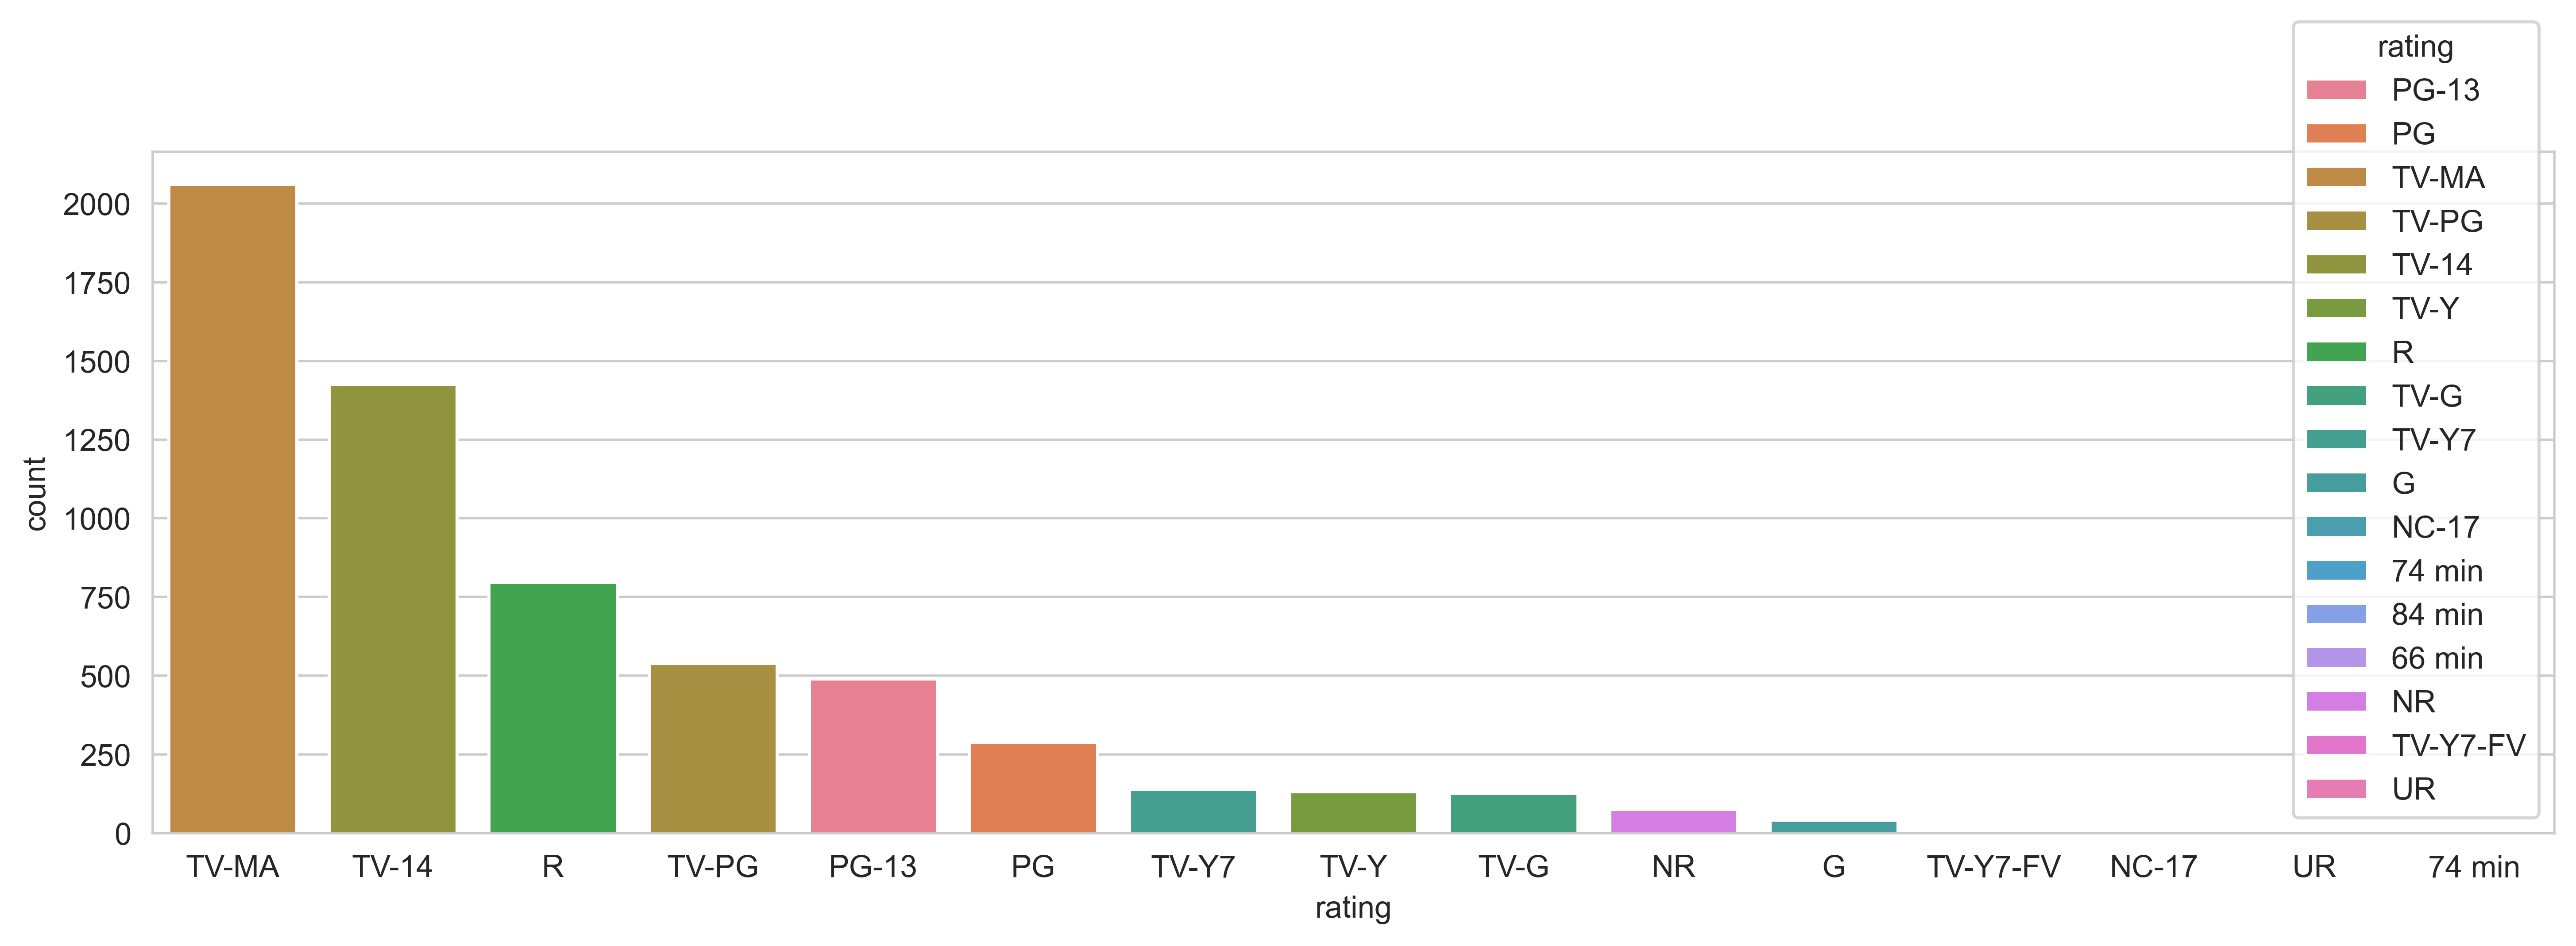

In [8]:
plt.figure(figsize=(14, 4), dpi=500)                                              # Set the size of the figure
sns.set_style('whitegrid')                                                        # Set the style of the plot
ax = sns.countplot(x="rating",  
                   data=netflix_movies,  
                   order=netflix_movies['rating'].value_counts().index[0:15], 
                   hue="rating")                                                  # Create the plot

### Analysing IMDB ratings to get top rated movies on Netflix

In [9]:
imdb_ratings = pd.read_csv('kaggle/IMDb_ratings.csv',
                           usecols=['weighted_average_vote'])          # Read the data
imdb_titles = pd.read_csv('kaggle/IMDb_movies.csv', 
                          usecols=['title','year','genre'])            # Read the data

ratings = pd.DataFrame({'Title': imdb_titles.title,
                        'Release Year': imdb_titles.year,
                        'Rating': imdb_ratings.weighted_average_vote,
                        'Genre': imdb_titles.genre})                   # Create the dataframe

ratings.drop_duplicates(subset=['Title','Release Year','Rating'], 
                        inplace=True)                                  # Drop the duplicates

In [10]:
ratings.dropna()                                                      # Drop the missing values
joint_data=ratings.merge(netflix_overall,
                         left_on='Title',
                         right_on='title',
                         how='inner')                                 # Merge the dataframes

joint_data=joint_data.sort_values(by='Rating', 
                                  ascending=False)                    # Sort the values

### Top rated 10 movies on Netflix

In [11]:
import plotly.express as px

In [12]:
top_rated = joint_data[0:10]                                        # Select the top 10
fig = px.sunburst(top_rated,
                  path=['title','country'],
                  values='Rating',
                  color='Rating')                                   # Create the plot
fig.show()                                                          # Show the plot

### Countries with highest rated content

In [13]:
country_count = joint_data['country'].value_counts().sort_values(ascending=False)  # Count the number of movies in each country
country_count = pd.DataFrame(country_count)                                        # Create the dataframe
topcountries = country_count[0:11]                                                 # Select the top 10 countries
topcountries

,count
country,
United States,1379
India,705
United Kingdom,147
Canada,68
"United Kingdom, United States",66
Philippines,55
Turkey,46
France,45
South Korea,45


In [14]:
data = dict(number=[1063, 619, 135, 60, 44, 41, 40, 40, 38, 35], 
            country=["United States", "India", "United Kingdom", 
                     "Canada", "Spain",'Turkey',
                     'Philippines','France','South Korea','Australia'])          # Create the dictionary
fig = px.funnel(data, x='number', y='country')                                   # Create the plot
fig.show()                                                                       # Show the plot

### Year wise analysis

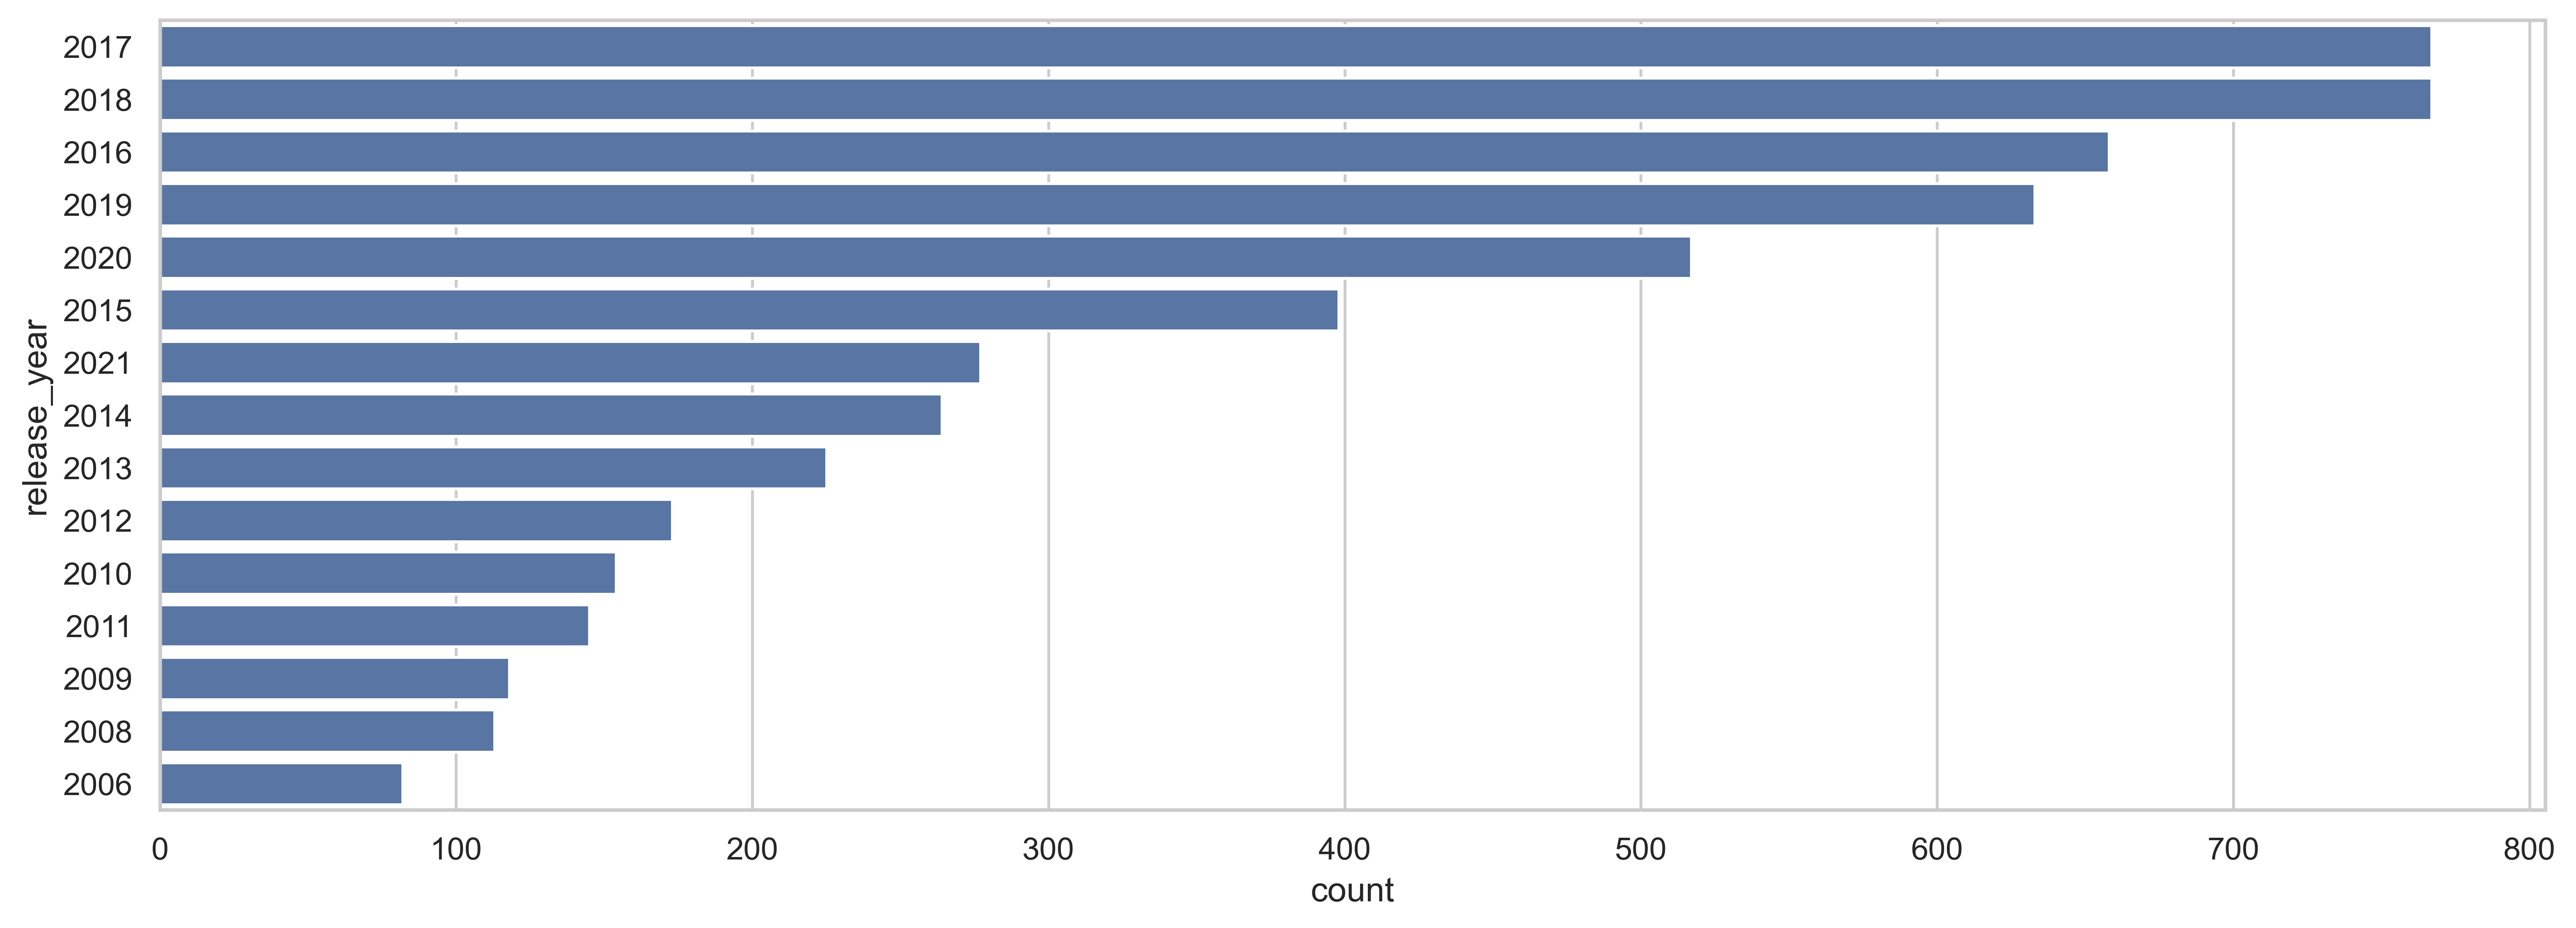

In [15]:
plt.figure(figsize=(15, 5), dpi=500)                                                  # Set the size of the figure
sns.set(style="whitegrid")                                                            # Set the style of the plot
ax = sns.countplot(y="release_year", 
                   data=netflix_movies, 
                   order=netflix_movies['release_year'].value_counts().index[0:15])   # Create the plot

### Top 10 movie content creating countries

In [16]:
countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou = list(netflix_movies['country'])
for i in cou:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_23932\375688962.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
countries_fin = {}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


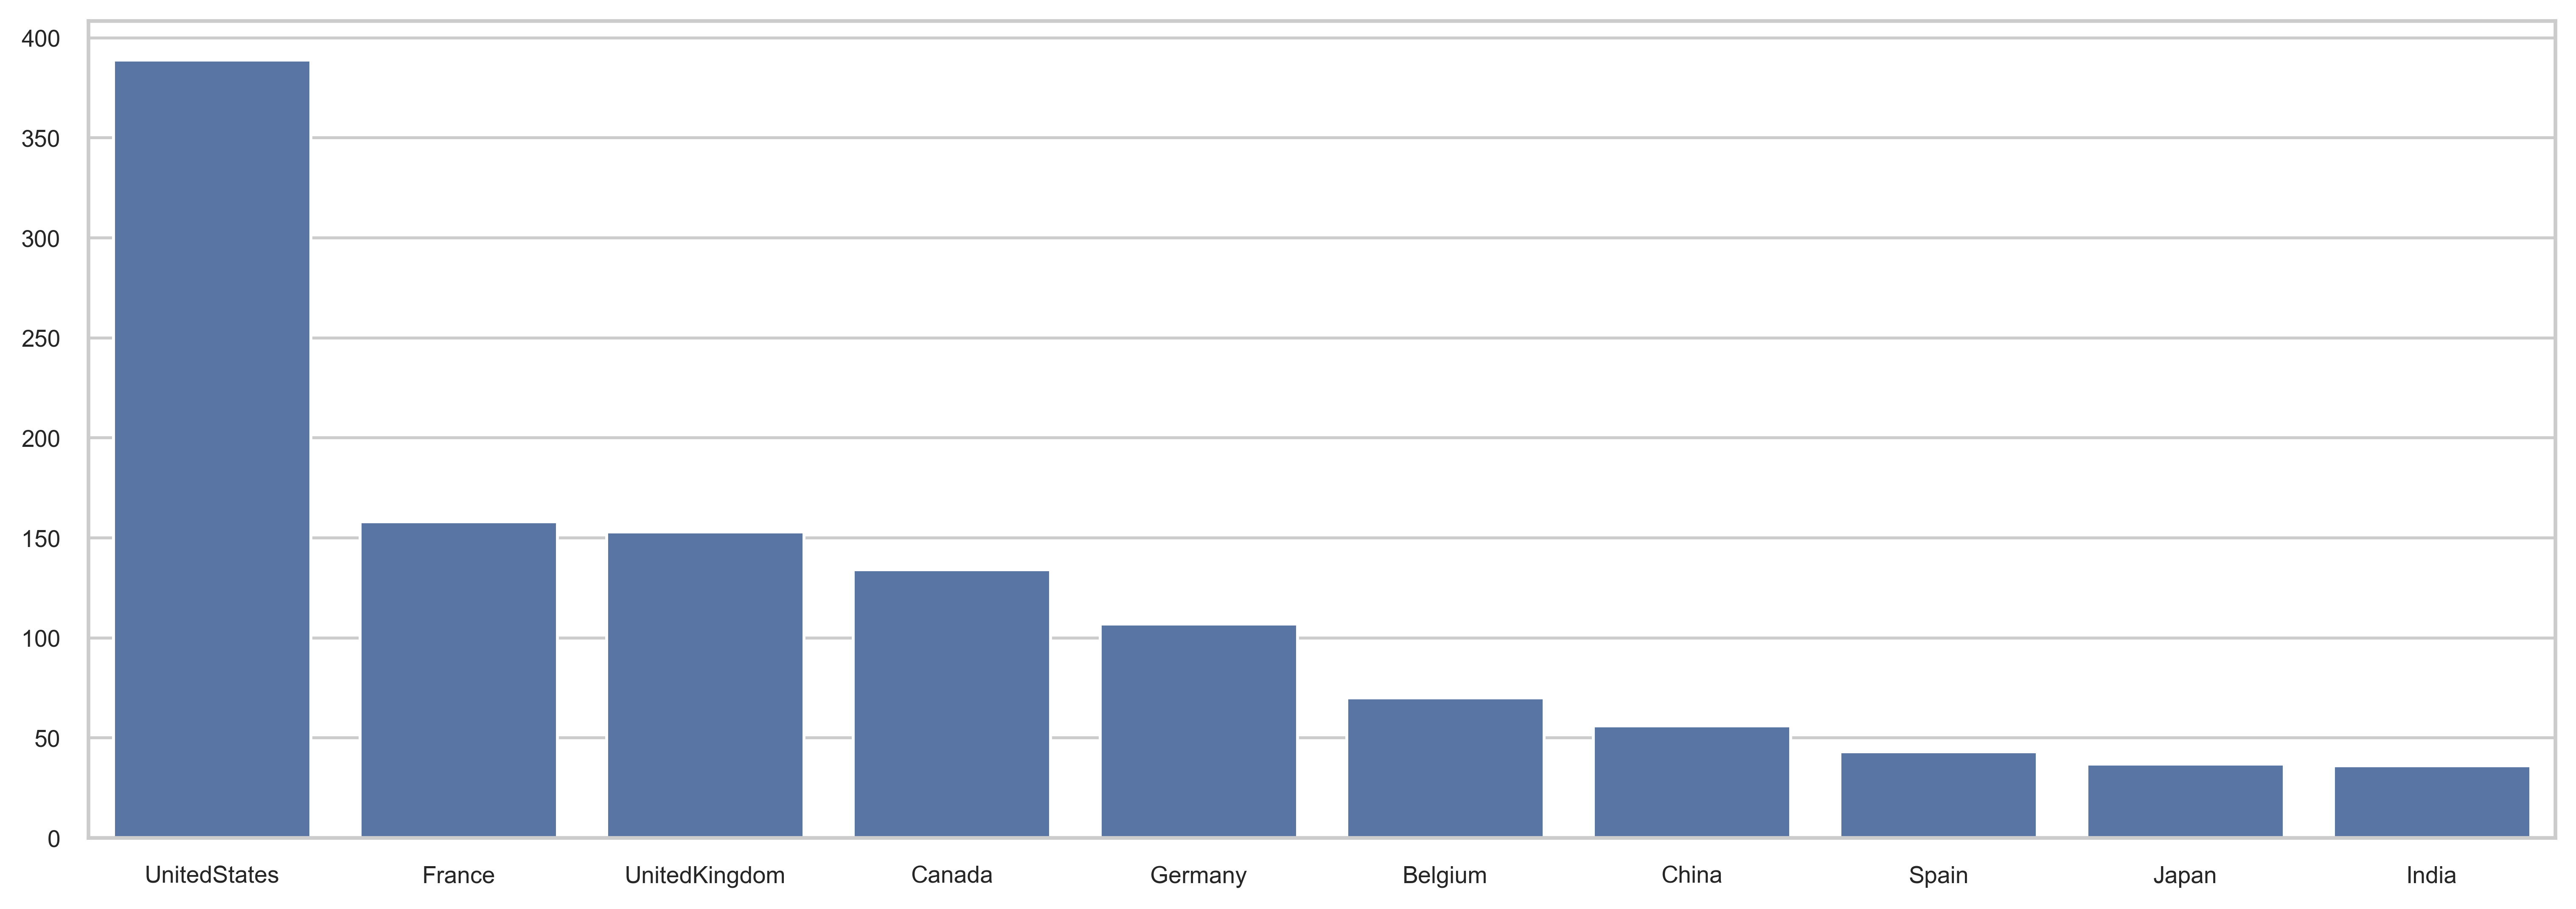

In [18]:
plt.figure(figsize=(15, 5), dpi=500)                                                 # Set the size of the figure
plt.xticks(fontsize=8, fontfamily='Arial')                                           # Set the x-ticks
plt.yticks(fontsize=8, fontfamily='Arial')                                           # Set the y-ticks
ax = sns.barplot(x=list(countries_fin.keys())[0:10], 
                 y=list(countries_fin.values())[0:10])                               # Create the plot

### Analysis of duration of movies

In [19]:
netflix_movies = netflix_movies.dropna()                                            # Drop the missing values
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')     # Remove the 'min' from the duration

In [20]:
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)      # Convert the duration to integer

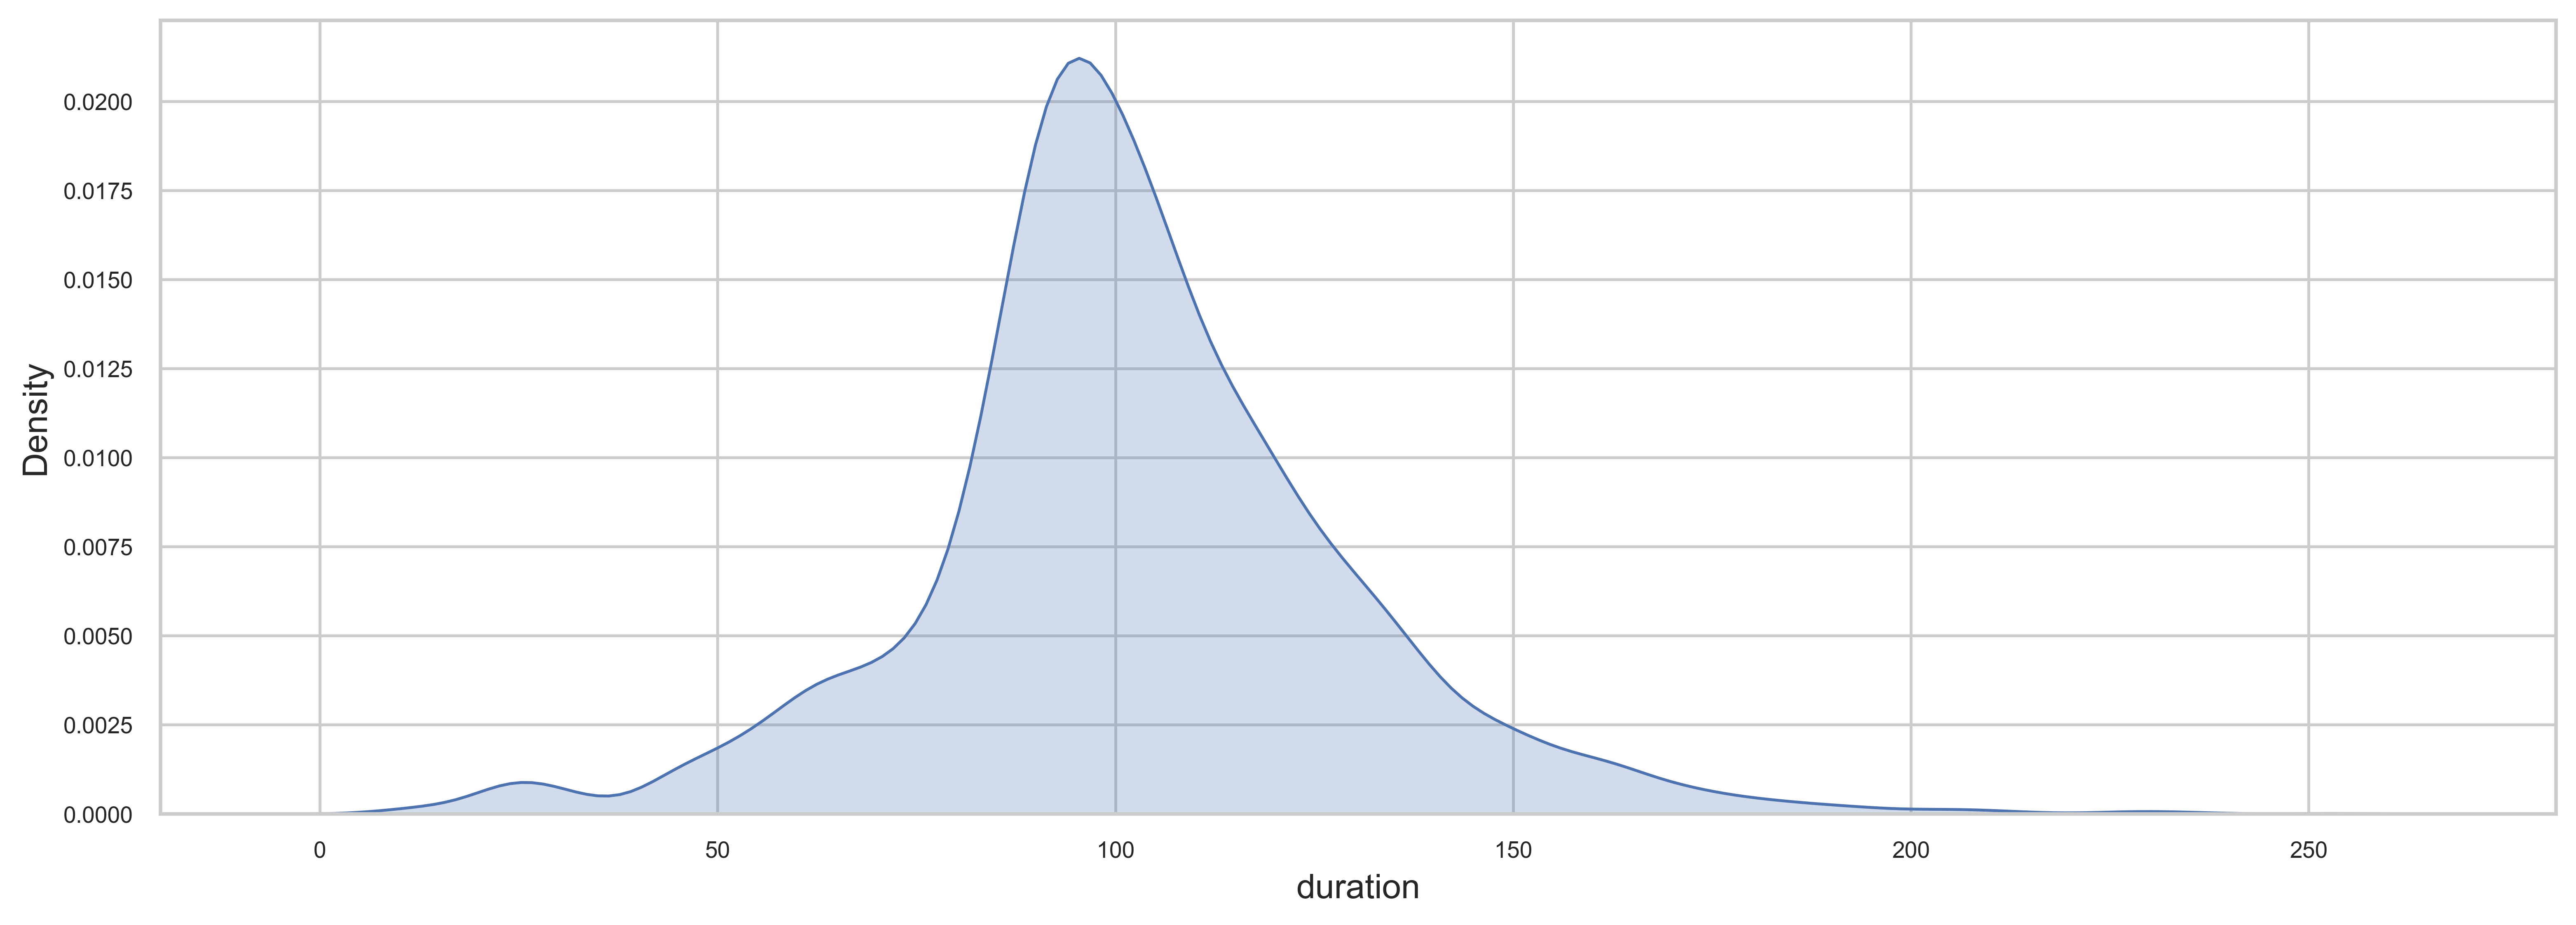

In [21]:
plt.figure(figsize=(15, 5), dpi=500)                                                # Set the size of the figure
plt.xticks(fontsize=8, fontfamily='Arial')                                          # Set the x-ticks
plt.yticks(fontsize=8, fontfamily='Arial')                                          # Set the y-ticks
sns.set(style="whitegrid")                                                          # Set the style of the plot
ax = sns.kdeplot(data=netflix_movies['duration'], 
                 fill=True)                                                         # Create the plot

### Lollipop plot of Genres vs their count on Netflix

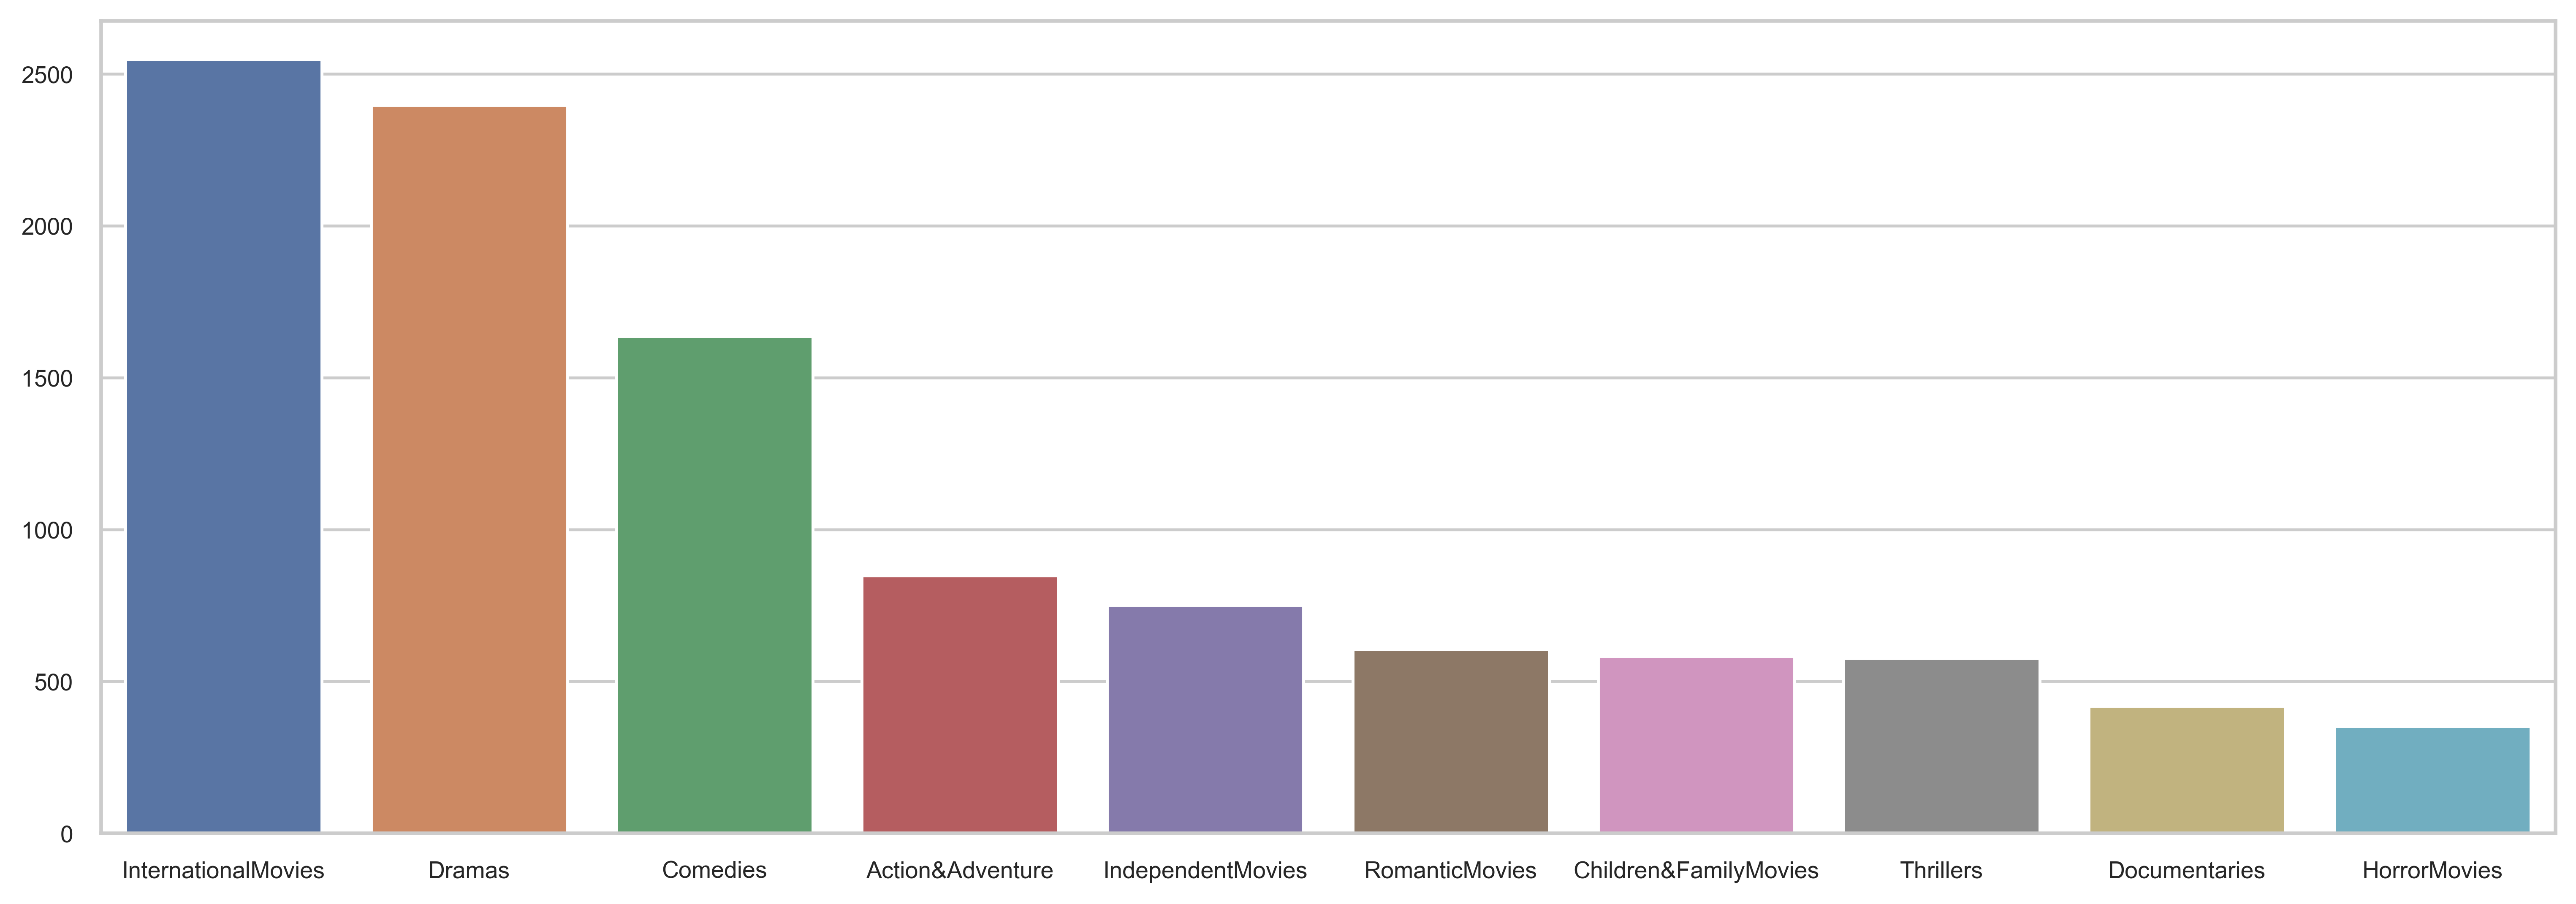

In [25]:
from collections import Counter

genres = list(netflix_movies['listed_in'])                                         # Create the list of genres
gen = []                                                                      

for i in genres:    
    i = list(i.split(','))                                                         # Split the genres
    for j in i: 
        gen.append(j.replace(' ',""))                                              # Remove the spaces
g = Counter(gen)                                                                   # Count the number of movies in each genre

g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}  # Sort the dictionary
x, y = list(g.keys()), list(g.values())                                            # Create the x and y axis

plt.figure(figsize=(15, 5), dpi=500)                                               # Set the size of the figure
plt.xticks(fontsize=8, fontfamily='Arial')                                         # Set the x-ticks
plt.yticks(fontsize=8, fontfamily='Arial')                                         # Set the y-ticks
sns.set(style="whitegrid")                                                         # Set the style of the plot
ax = sns.barplot(x=x[0:10], y=y[0:10], hue=x[0:10])                                # Create the plot

### Most content creating countries

In [ ]:
countries1 = {}
netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')
cou1 = list(netflix_shows['country'])
for i in cou1:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries1.keys()):
            countries1[i] += 1
        else:
            countries1[i[0]] = 1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j] += 1
            else:
                countries1[j] = 1

In [27]:
countries_fin1 = {}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country] += no
    else:
        countries_fin1[country] = no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

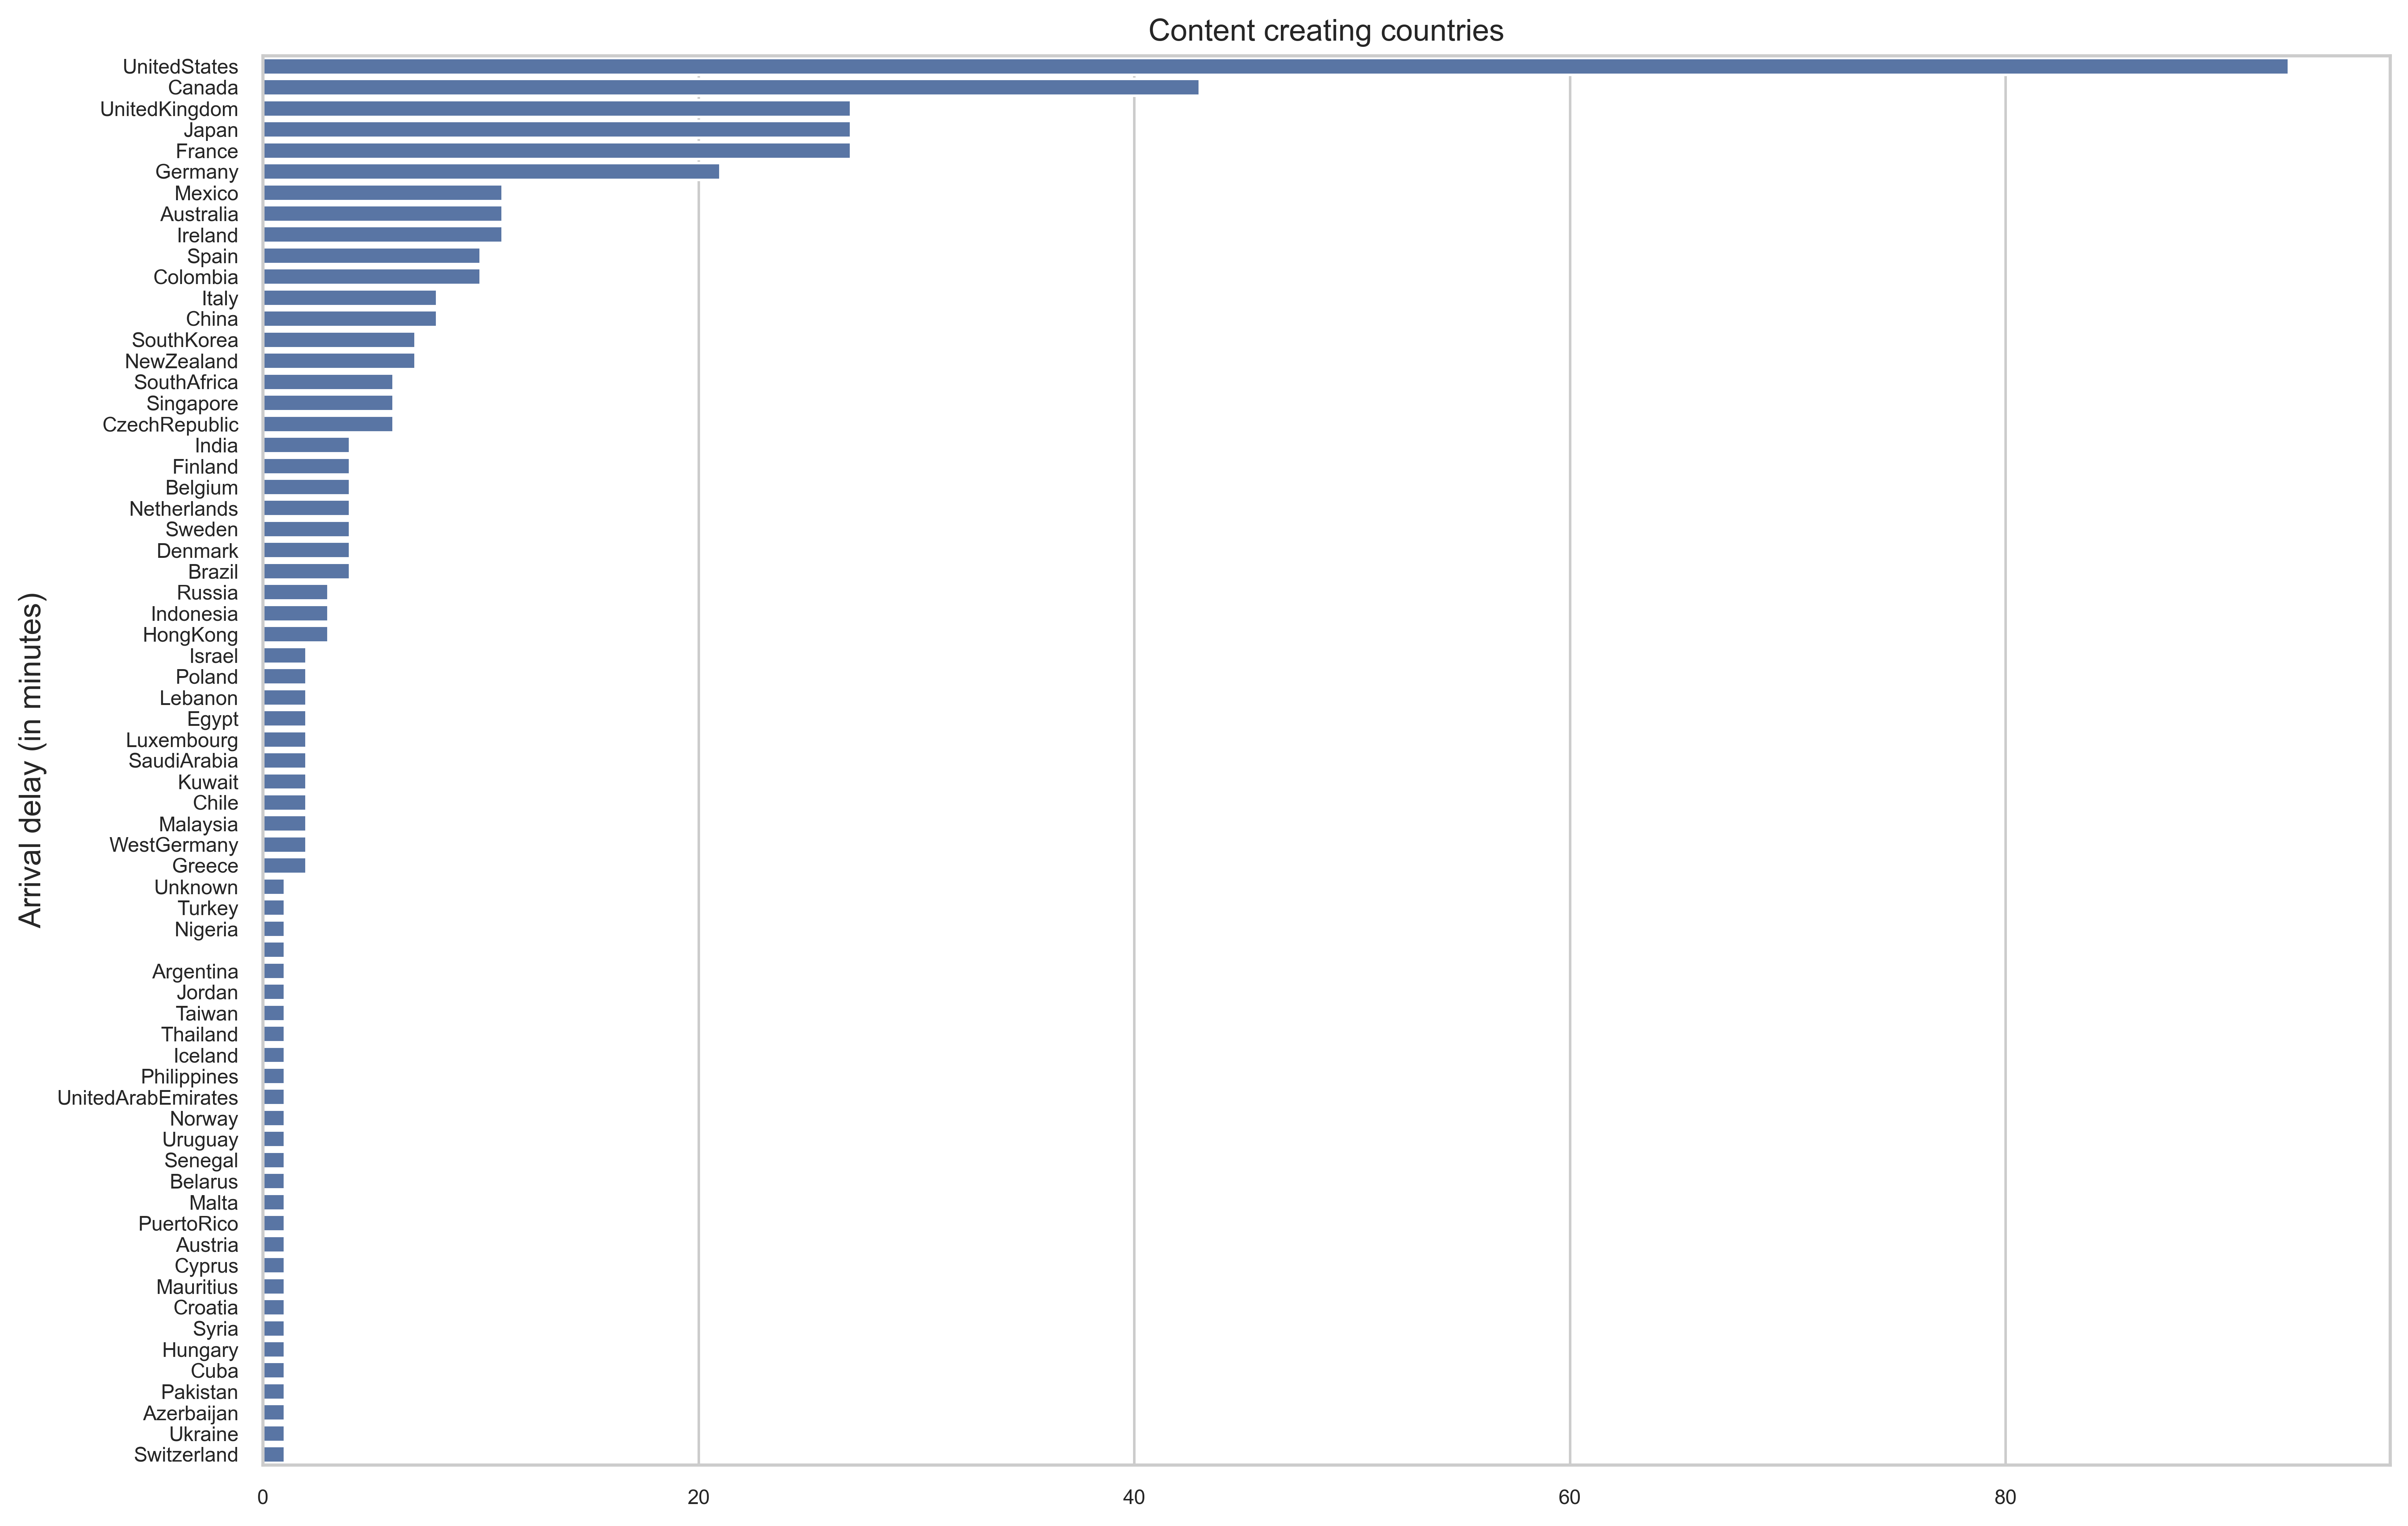

In [28]:
plt.figure(figsize=(15, 10), dpi=500)                                       # Set the width and height of the figure
plt.xticks(fontsize=8, fontfamily='Arial')                                  # Set the x-ticks
plt.yticks(fontsize=8, fontfamily='Arial')                                  # Set the y-ticks
plt.title("Content creating countries")                                     # Add title
plt.ylabel("Arrival delay (in minutes)")                                    # Add label for vertical axis
ax = sns.barplot(y=list(countries_fin1.keys()), 
                 x=list(countries_fin1.values()))                           # Bar chart showing average arrival delay for Spirit Airlines flights by month

### Content in United States

In [30]:
netflix_fr=netflix_overall[netflix_overall['country']=='United States']
nannef=netflix_fr.dropna()
fig = px.treemap(nannef, path=['country','director'],
                 color='director', 
                 hover_data=['director','title'],
                 color_continuous_scale='white')
fig.show()


### Top Duration

In [35]:
import plotly.graph_objects as go
 
topdirs = pd.value_counts(netflix_overall['duration'])                      # Count the number of movies in each duration
fig = go.Figure([go.Bar(x=topdirs.index, 
                        y=topdirs.values , 
                        text=topdirs.values,
                        marker_color='blue')])                              # Create the plot
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside')                                   # Set the text position
fig.show()

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_23932\511979679.py:3: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



### Recommendation System (Content Based)

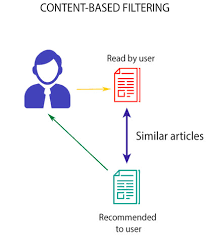

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer(stop_words='english')                                   # Removing stopwords
netflix_overall['description'] = netflix_overall['description'].fillna('')      # Replace NaN with an empty string
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])              # Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix.shape                                                              # Output the shape of tfidf_matrix

(8807, 18895)

There are about 16151 words described for the 6234 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

<img src='https://i.stack.imgur.com/36r1U.png'>

In [38]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)                  # Compute the cosine similarity matrix

In [40]:
indices = pd.Series(netflix_overall.index, 
                    index=netflix_overall['title']).drop_duplicates()   # Construct a reverse map of indices

In [41]:
def get_recommendations(title, cosine_sim=cosine_sim):                  # Function that takes in movie title as input and outputs most similar movies
    idx = indices[title]                                                # Get the index of the movie that matches the title
    
    sim_scores = list(enumerate(cosine_sim[idx]))                       # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)   # Sort the movies based on the similarity scores
    sim_scores = sim_scores[1:11]                                       # Get the scores of the 10 most similar movies

    movie_indices = [i[0] for i in sim_scores]                          # Get the movie indices
    return netflix_overall['title'].iloc[movie_indices]                 # Return the top 10 most similar movies

This recommendation is just based on the Plot.

In [43]:
get_recommendations('Peaky Blinders')                                   # Get the recommendations

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [44]:
get_recommendations('Mortel')                                          # Get the recommendations

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

### Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [58]:
filledna = netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Cleaning the data - making all the words lower case

In [59]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [60]:
features = ['title','director','cast','listed_in','description']
filledna = filledna[features]

In [62]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


Creating a "soup" or a "bag of words" for all rows.

In [63]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [64]:
filledna['soup'] = filledna.apply(create_soup, axis=1)


From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [66]:
filledna = filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [67]:
def get_recommendations_new(title, cosine_sim=cosine_sim):             
    title=title.replace(' ','').lower()                                 # Function that takes in movie title as input and outputs most similar movies
    idx = indices[title]                                                # Get the index of the movie that matches the title

    
    sim_scores = list(enumerate(cosine_sim[idx]))                       # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)   # Sort the movies based on the similarity scores
    sim_scores = sim_scores[1:11]                                       # Get the scores of the 10 most similar movies

    movie_indices = [i[0] for i in sim_scores]                          # Get the movie indices

    return netflix_overall['title'].iloc[movie_indices]                 # Return the top 10 most similar movies

In [69]:
get_recommendations_new('PK', cosine_sim2)                              # Get the recommendations

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
6907                             Haapus
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [70]:
get_recommendations_new('Peaky Blinders', cosine_sim2)                 # Get the recommendations

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object

In [71]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)              # Get the recommendations

2982                                        Find Yourself
1038                                       Dancing Angels
7438                     Melodies of Life - Born This Way
3293                                        Little Things
6508    Club Friday To Be Continued - My Beautiful Tomboy
7872                                           Rishta.com
3463                                      College Romance
4171                                    The Perfect Match
4487                                 Accidentally in Love
5703                                          Refresh Man
Name: title, dtype: object